In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
"""
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)
"""
sys.path.append("../..")
sys.path.append("..")

from analysis.plot_utils import disp_learn_hist, plot_classifier_response, compute_roc, plot_roc, plot_rocs
from analysis.comparison_utils import get_masked_data, collapse_test_output

from test_utils import test_collapse_test_output, prep_roc_data, plot_multiple_ROC

In [4]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [5]:
############# define run location #############
loc = '/home/jtindall/WatChMaL/outputs/2020-10-22/15-36-22/outputs'
#'/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_1/outputs'

In [6]:
############# define plotting params #############
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2020-10-22/15-36-22/outputs/log_train_0.csv']


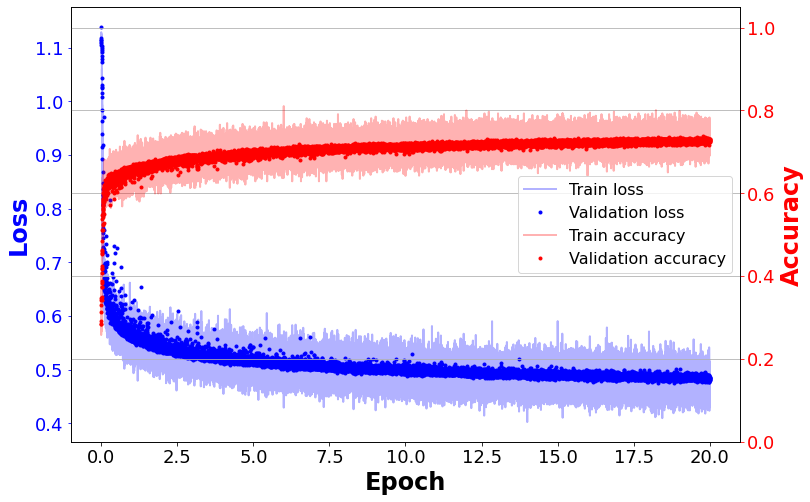

In [7]:
############# display learning history #############
disp_learn_hist(loc)
#disp_learn_hist_smoothed(loc)

In [7]:
############# load old run data #############
idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
indices = np.load(idx_file_path)['test_idxs']

cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

cuts_to_apply= ['fq_failed', 'fq_flag']

raw_predicted_labels = np.load(loc + "/predictions.npy")
raw_output_softmax   = np.load(loc + "/softmax.npy")
raw_actual_labels    = np.load(loc + "/labels.npy")

In [8]:
############# apply cuts to data #############
predicted_labels = get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)
output_softmax   = get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply)
actual_labels    = get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)

{'$\\gamma$': 0, '$e$': 1, '$\\mu$': 2}
{'$\\gamma$': 0, '$e$': 1, '$\\mu$': 2}
{'$\\gamma$': 0, '$e$': 1, '$\\mu$': 2}


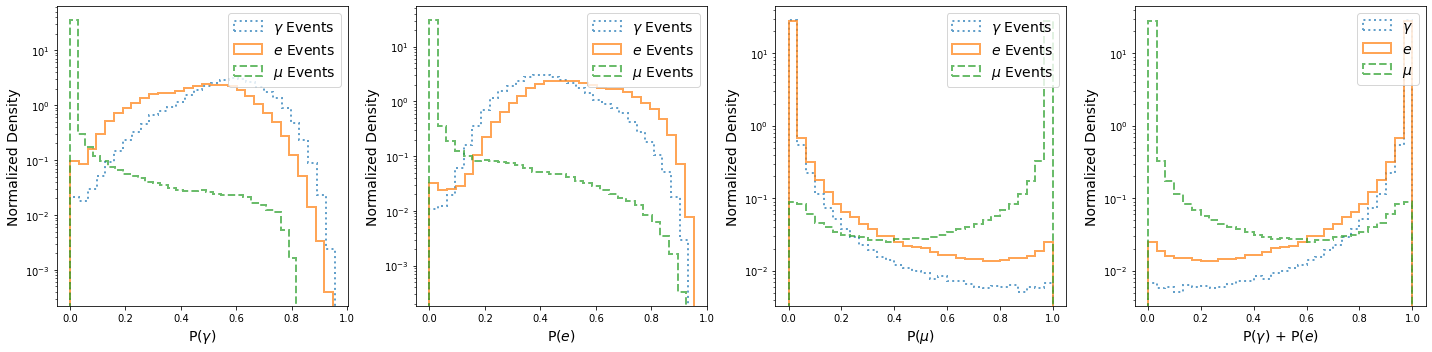

In [9]:
############# plot classifier response #############
plot_classifier_response(output_softmax, actual_labels, particle_names=['$\gamma$','$e$','$\mu$'], label_dict=label_dict, linestyles=(':','-','--'), extra_panes =[['$\gamma$','$e$']], bins=30)

In [8]:
############# plot e/gamma ROC #############
fpr, tpr, thr = compute_roc(output_softmax, actual_labels, true_label=label_dict["$e$"], false_label=label_dict["$\gamma$"])
figs = plot_roc(fpr, tpr, thr, "$e$", "$\gamma$", fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], show=False);

NameError: name 'output_softmax' is not defined

In [9]:
############# plot e/mu ROC #############
fpr, tpr, thr = compute_roc(output_softmax, actual_labels, true_label=label_dict["$e$"], false_label=label_dict["$\mu$"])
figs = plot_roc(fpr, tpr, thr, "$e$", "$\mu$", fig_list=[1], show=False);

NameError: name 'output_softmax' is not defined

In [127]:
############# plot multiple ROC at once #############
#plot_rocs(output_softmax, actual_labels, labels_dict=label_dict, plot_list=None, vs_list = None, show=True)

In [128]:
############# plot collapsed ROC #############
collapsed_class_scores, collapsed_class_labels = test_collapse_test_output(output_softmax, actual_labels, label_dict)
collapsed_class_labels=collapsed_class_labels - 1
collapsed_class_scores=collapsed_class_scores[:,1:]

muon_softmax_index_dict = {"e/gamma":0, "mu":1}


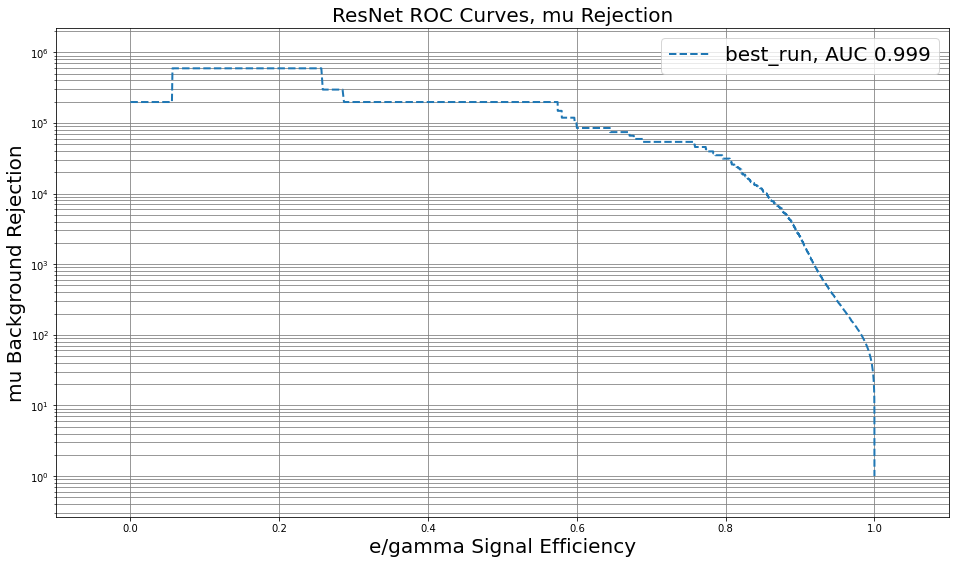

In [129]:
fprs, tprs, thresholds = zip(*[prep_roc_data(collapsed_class_scores, collapsed_class_labels,'rejection',muon_softmax_index_dict,"e/gamma","mu")])
    
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
roc_metrics = plot_multiple_ROC((fprs, tprs, thresholds),'rejection', ["e/gamma", "mu"], 
                                plot_labels=["best_run"],
                                ax=ax,png_name='best_emu.pdf',title=f"ResNet ROC Curves, mu Rejection",annotate=False, linestyle=['--','-'])

In [130]:
############# plot collapsed ROC #############
"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""
collapsed_class_scores, collapsed_class_labels = collapse_test_output(output_softmax, actual_labels, label_dict)
collapsed_class_labels=collapsed_class_labels - 1
collapsed_class_scores=collapsed_class_scores[:,1:]

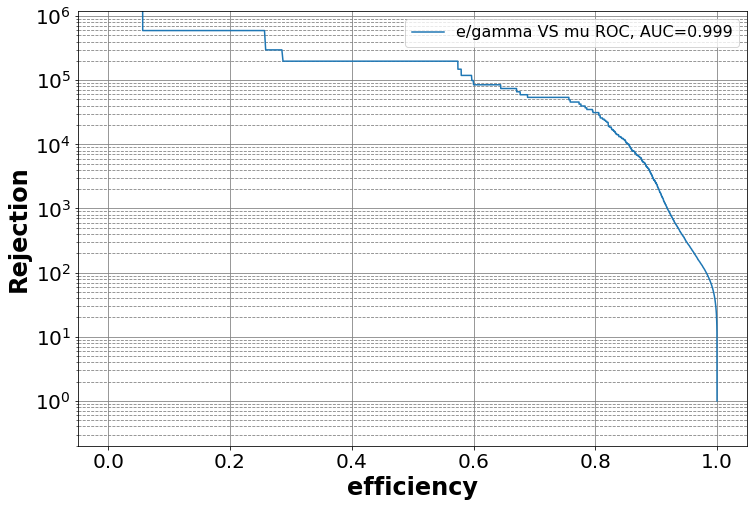

In [131]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr, tpr, thr = compute_roc(collapsed_class_scores, collapsed_class_labels, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = plot_roc(fpr, tpr, thr,"e/gamma", "mu", fig_list=[1], show=False)